# CME 241 (Winter 2021) -- Assignment 5

## Question 1

In [16]:
from __future__ import annotations

from dataclasses import dataclass, field
from typing import Iterable, Tuple, Optional, TypeVar

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

from rl.function_approx import FunctionApprox

In [34]:
@dataclass
class UnivariateSplineApprox(FunctionApprox[float]):
    """A univariate BSpline function approximator."""
    
    _spline: UnivariateSpline = field(default=None, init=False, repr=False)
    
    def representational_gradient(
        self, x_value: float
    ) -> UnivariateSplineApprox[float]:
        """Return the first derivate of the spline at the point `x_value"""
        if not self._spline:
            raise ValueError("No data processed, unable to determine gradient.")
        return self._spline.derivative(x)[0]
    
    def evaluate(self, x_values_seq: Iterable[float]) -> np.ndarray:
        """Compute the expected value of y given x."""
        return np.array([self._spline(x) for x in x_values_seq])
    
    def update(
        self, xy_vals_seq: Iterable[Tuple[float, float]]
    ) -> UnivariateSplineApprox[float]:
        """`scipy.interpolate.UnivariateSpline does not allow incremental
        updates, so we just refit."""
        x, y = zip(*xy_vals_seq)
        self._spline = UnivariateSpline(x, y)
        return self
    
    def solve(
        self, 
        xy_vals_seq: Iterable[Tuple[float, float]],
        error_tolerance: Optional[float] = None
    ) -> UnivariateSplineApprox[float]:
        """A solve is an update since we don't do incremental updates."""
        return self.update(xy_vals_seq)
    
    def within(
        self, other: UnivariateSplineApprox[float], tolerance: float = 1e-6
    ) -> bool:
        """Determine if two Splines are approximately equal."""
        if not instance(other, UnivariateSplineApprox):
            return False
        knots = self._spline.get_knots()
        coeffs = self._spline.get_coeffs()
        if len(knots) != len(other._spline.get_knots()):
            return False
        same_knots = (np.abs(knots - other._spline.get_knots()) <= tolerance).all()
        same_coeffs = (np.abs(coeffs - other._spline.get_coeffs()) <= tolerance).all()
        return same_knots and same_coeffs

In [69]:
# Empirical data has a quadratic curvature with some added noise
x = np.linspace(-3, 3, 10)
y = np.square(x) + np.random.randn(10)

spline = UnivariateSplineApprox()
spline.update(zip(x, y))

xs = np.linspace(-3, 3, 50)

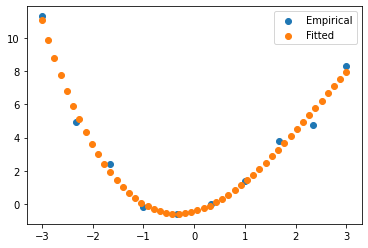

In [70]:
plt.scatter(x, y, label="Empirical")
plt.scatter(xs, spline.evaluate(xs), label="Fitted")
plt.legend()
plt.show()